# Exploratory Data (2) : K-Pop Groups

![kpop](wp8071925-nct-resonance-wallpapers.jpg)
![](https://wallpapercave.com/nct-resonance-wallpapers)

If you have read my previous article [here](https://wallpapercave.com/nct-resonance-wallpapers), you will not be surprised about this article. I will continue exploring K-pop data. 

As I say before K-pop idols have data! And it will be interesting if we explore this. I will analyze each feature to make the data exploration easier. I will use two datasets : K-pop boy group and K-pop girl group profiles from 1992 to 2020. I will use pie charts to visualize data because I want to see the percentage of the totals data.

Data source : [K-Pop Database](https://dbkpop.com/)

#### Content
* Data preparation
* Data features
- 1) Name
- 2) Company
- 3) Member and Original Member
- 4) Active
- 5) Debut

In [1]:
# Importing needed packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Improting datasets
## Boy group dataset
boys = pd.read_csv('kpop_idols_boy_groups.csv')
display(boys.head())
## Girl group dataset
girls = pd.read_csv('kpop_idols_girl_groups.csv')
display(girls.head())

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes
1,14U,NaN,원포유,2017-04-17,BG,14,14,NaN,Yes
2,1the9,NaN,원더나인,2019-02-09,MBK,9,9,NaN,Yes
3,24K,NaN,투포케이,2012-09-06,Choeun,8,6,24U,Yes
4,2AM,NaN,투에이엠,2008-06-21,"JYP, Big Hit",4,4,I Am,No


,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,(G)I-DLE,NaN,(여자)아이들,2018-05-02,Cube,6,6,NaN,Yes
1,15&,NaN,피프틴앤드,2012-10-05,JYP,2,2,NaN,No
2,2EYES,NaN,투아이즈,2013-07-20,SidusHQ,4,5,NaN,No
3,2NE1,NaN,투애니원,2009-05-06,YG,4,4,Blackjack,No
4,3YE,NaN,써드아이,2019-05-21,GH,3,3,NaN,Yes


In [3]:
# Checking missing values
## Boy group
count_missing_b = boys.isnull().sum().sort_values(ascending = False)
print(count_missing_b)

Short           129
Fanclub Name     86
Company           1
Active            0
Orig. Memb.       0
Members           0
Debut             0
Korean Name       0
Name              0
dtype: int64


In [4]:
## Girl group
count_missing_g = girls.isnull().sum().sort_values(ascending = False)
print(count_missing_g)

Short           131
Fanclub Name    106
Active            0
Orig. Memb.       0
Members           0
Company           0
Debut             0
Korean Name       0
Name              0
dtype: int64


Most boy and girl groups here didn't have short names, then I will drop <code>Short</code> column, and also <code>Korean Name</code> because I assumed the readers here already know the groups without their Korean name.

In [5]:
boys = boys.drop(['Short', 'Korean Name'], axis=1)
boys.head(1)

,Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,100%,2012-09-18,TOP Media,4,7,Perfection,Yes


In [6]:
girls = girls.drop(['Short', 'Korean Name'], axis=1)
girls.head(1)

,Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,(G)I-DLE,2018-05-02,Cube,6,6,NaN,Yes


Now, I will calculate missing values in <code>Fanclub Name</code>.

In [7]:
# Counting missing value percentage
## Boy group
count_missing_b = boys['Fanclub Name'].isnull().sum()
print(count_missing_b/len(boys.index)*100)

58.50340136054422


In [8]:
## Girl groups
count_missing_g = girls['Fanclub Name'].isnull().sum()
print((count_missing_g/len(girls.index))*100)

69.73684210526315


The missing values in both <code>Fanclub Name</code> is above 50% percent. I assumed, it has two possibilities : 
- They didn't have official fanclub name yet.
- They already have official fanclub name, but is not dataset is not updated yet

According to [WiDS Datathon](https://medium.com/wids-mysore/handling-missing-values-82ce096c0cef), if the information contained in the variable is not that high, you can drop the variable if it has more than 50% missing values. I will drop this column.

In [9]:
boys = boys.drop(['Fanclub Name'], axis=1)
girls = girls.drop(['Fanclub Name'], axis=1)

## Now, let's getting insights from each feature!

### 1. Name
**a). Boy group**

In [10]:
boys['Name'].nunique()

147

**b) Girl group**

In [11]:
girls['Name'].nunique()

152

We could see here, there are 147 boy groups and 152 girl groups in K-pop from 1992 to 2020. The girl groups is greater than boy groups.

### 2. Company
**a) Boy group**

In [12]:
boys['Company'].nunique()

110

**b) Girl group**

In [13]:
girls['Company'].nunique()

120

In [14]:
boys[boys['Name'] == '2AM']

,Name,Debut,Company,Members,Orig. Memb.,Active
4,2AM,2008-06-21,"JYP, Big Hit",4,4,No


110 is a big number because the boy group itself is 147. If we look deeper, we can find data, for example, 2AM belonged to two companies, JYP and Big Hit. And many data that is similar to this data. The groups can be managed by one or multiple companies. 

The company of girl groups is in the same case here. A company can have one or more girl groups and boy groups. [SM Entertainment](https://kpop.fandom.com/wiki/SM_Entertainment) is currently home to idol groups such as SUPER JUNIOR, Girls' Generation, SHINee, EXO, Red Velvet, NCT, SuperM and aespa in addition to numerous non-idol groups and solo artists.

So, the *.nunique()* method I have used here didn't give an exact result. It will be challenging to get how many companies are here, do you want to try? Let me know.

### 3. Member and Original Member
I see something interesting from these two columns, they are not the same. Why? Let's look deeper.
 Firstly, I will create a function to compare the values in these two columns. Then, I will create a new column <code>Memb. Status</code> with three statement :
- 'Same', if member = original member
- 'Added', if member > original member (there's member added to the group)
- 'Subtracted', if member < original member (there's member subtraction from the group)

In [15]:
# Fuction to create new feature : member status
def members(row):    
    if row['Members'] == row['Orig. Memb.']:
        return 'Same'
    if row['Members'] > row['Orig. Memb.']:
        return 'Added'
    if row['Members'] < row['Orig. Memb.']:
        return 'Subtracted'

**a) Boy group**

In [16]:
boys['Memb. Status'] = boys.apply(lambda row: members(row), axis=1)
boys['Memb. Status'].value_counts()

Same          103
Subtracted     39
Added           5
Name: Memb. Status, dtype: int64

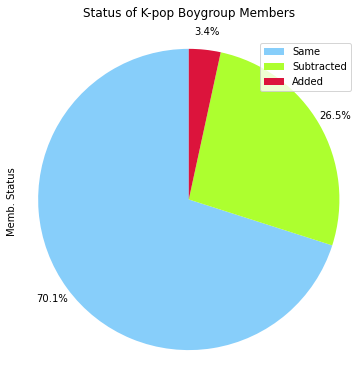

In [38]:
# Pie chart
colors_list = ['lightskyblue', 'greenyellow', 'crimson']
member_b = boys['Memb. Status'].value_counts()
member_b.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, labels=None, pctdistance=1.12, 
             colors=colors_list)

plt.title('Status of K-pop Boygroup Members\n')
plt.axis('equal')
plt.legend(labels=['Same', 'Subtracted', 'Added'], loc='upper right') 
plt.show()

**b) Girl groups**

In [18]:
girls['Memb. Status'] = girls.apply(lambda row: members(row), axis=1)
girls['Memb. Status'].value_counts()

Same          90
Subtracted    47
Added         15
Name: Memb. Status, dtype: int64

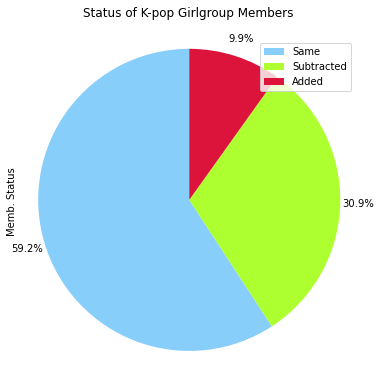

In [39]:
colors_list = ['lightskyblue', 'greenyellow', 'crimson']
member_g = girls['Memb. Status'].value_counts()
member_g.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, labels=None, pctdistance=1.12, 
             colors=colors_list)

plt.title('Status of K-pop Girlgroup Members\n')
plt.axis('equal')
plt.legend(labels=['Same', 'Subtracted', 'Added'], loc='upper right') 
plt.show()

If we compare these pie charts, the boy group is stable enough than girl group with 70.1% of them maintain the member. The girl group has more subtraction members but also a more added members. To understand why the number of members can change, let's see from the examples below :

**a) Subtraction members**: [EXO](https://kpop.fandom.com/wiki/EXO) is a nine-member boy group under SM Entertainment. They debuted on April 8, 2012, with their first mini-album Mama.
The group originally consisted of twelve members; Xiumin, Luhan, Kris, Suho, Lay, Baekhyun, Chen, Chanyeol, D.O., Tao, Kai, and Sehun, who were divided into two sub-units, EXO-K and EXO-M, one promoting in Korean and the other in Mandarin. Between 2014 and 2015, the group lost three of its members: Kris, Luhan, and Tao, respectively, preferring to focus on their individual careers in China.

In [20]:
boys[boys['Name'] == 'EXO']

,Name,Debut,Company,Members,Orig. Memb.,Active,Memb. Status
43,EXO,2012-04-08,SM,9,12,Yes,Subtracted


**b) Addition members**: [Red Velvet](https://redvelvet.fandom.com/wiki/Red_Velvet) debuted on August 1, 2014, with the song "Happiness" and four members: Irene, Seulgi, Wendy, and Joy. On March 11, 2015, Yeri joined the group. The company, SM, waited on Yeri because of her age (she would've been 15 years old) and decided to add her in the group for the 2015 comeback of Ice Cream Cake when Yeri was 16.

In [21]:
girls[girls['Name'] == 'Red Velvet']

,Name,Debut,Company,Members,Orig. Memb.,Active,Memb. Status
122,Red Velvet,2014-08-01,SM,5,4,Yes,Added


**c) Bonus**: [NCT](https://smtown-nctzens.fandom.com/wiki/NCT), an acronym for Neo Culture Technology, they are best known for being able to have an unlimited number of members and sub-units. Until 2020, they have 23 members. They added 3 members in 2018 then two members in 2020. The dataset I use here is from 1992 to 2020 but some of the data is not updated yet.

In [22]:
boys[boys['Name'] == 'NCT']

,Name,Debut,Company,Members,Orig. Memb.,Active,Memb. Status
91,NCT,2016-04-09,SM,18,18,Yes,Same


The number of members in the K-pop group can change, it can be addition or subtraction. Every group has its own reasons, so we can not generalize that.

Wait ... but what if they only change the member (the idol) but the number is the same? I mean a substitutional member. Who knows.

###  4. Active
I want to know K-pop activity status in pie charts.

**a) Boy group**

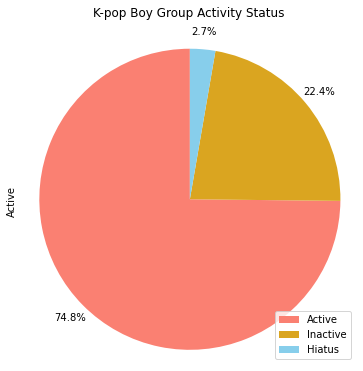

In [41]:
colors_list = ['salmon', 'goldenrod', 'skyblue']
active_b = boys['Active'].value_counts() # Activity column
active_b.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, labels=None, pctdistance=1.12, 
             colors=colors_list)

plt.title('K-pop Boy Group Activity Status\n')
plt.axis('equal')
plt.legend(labels=['Active', 'Inactive', 'Hiatus'], loc='lower right') 
plt.show()

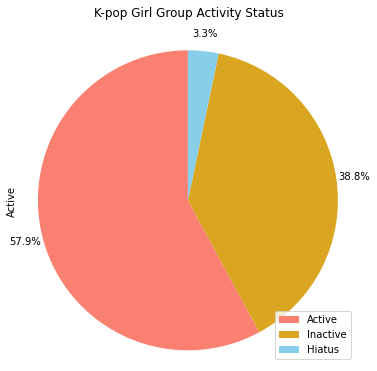

In [42]:
colors_list = ['salmon', 'goldenrod', 'skyblue']
active_g = girls['Active'].value_counts() # Activity column
active_g.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, labels=None, pctdistance=1.12, 
             colors=colors_list)

plt.title('K-pop Girl Group Activity Status\n')
plt.axis('equal')
plt.legend(labels=['Active', 'Inactive', 'Hiatus'], loc='lower right') 
plt.show()

If we compare the pie charts, the boy group is more active than the girl group with three-quarter of them are active groups. Even the number of girl groups is more than the boy group, 38.8% of them are inactive. Generally, these inactive groups are caused by disbanding. The disband itself can be caused by the member didn’t renew their contracts with the company, renewed their contracts with another company, they were a temporary group, preferring to focus on their individual careers, or so on.

Here's the example of disbanded girl group: the well-known are 2NE1 and 4Minute which disbanded in 2016.

In [25]:
girls[girls['Active'] == 'No'].head()

,Name,Debut,Company,Members,Orig. Memb.,Active,Memb. Status
1,15&,2012-10-05,JYP,2,2,No,Same
2,2EYES,2013-07-20,SidusHQ,4,5,No,Subtracted
3,2NE1,2009-05-06,YG,4,4,No,Same
5,4Minute,2009-06-15,Cube,5,5,No,Same
7,9Muses,2010-08-12,Star Empire,4,9,No,Subtracted


The number of hiatus groups is not quite different between the boy and girl groups. [Hiatus](https://kpopinfo114.wordpress.com/female_artist_profiles/indefinite-hiatus-inactive-in-korea/) means the group no longer promotes in Korea at all but are not disbanded. The hiatus status is only given to groups where both members and the company has stated it is a hiatus. Here's the example of hiatus boy groups :

In [26]:
boys[boys['Active'] == 'Hiatus']

,Name,Debut,Company,Members,Orig. Memb.,Active,Memb. Status
20,Beatwin,2014-01-06,Elen,2,6,Hiatus,Subtracted
29,Boys Republic,2013-06-03,"Happy Tribe, Universal",5,5,Hiatus,Same
128,Turbo,1995-09-06,"MBK, Turbo Co.",3,2,Hiatus,Added
146,ZE:A,2010-01-07,Star Empire,9,9,Hiatus,Same


But what happens to K-pop idols who are on hiatus?

[Viki Topalova](https://www.quora.com/What-happens-to-Kpop-idols-who-are-on-hiatus) said many things can happen to groups on hiatus. Members can come back as solo or sub-units to perform, they can promote themselves and their group by themselves in dramas, films, variety shows, TV shows, musicals, model jobs, article writing, etc. Or they can take a break, maybe a holiday or rest up. Being an idol is a tough job and injuries are pretty much guaranteed. However, the longer a group’s on hiatus the harder it will be for them to comeback. During the hiatus, fans could leave, newer groups could challenge the hiatus group’s position in the K-pop food chain, and so on. Also, a long hiatus could mean impending disbandment and possibly members leaving. Hiatuses are not always a good thing for the company, the group, and the fans.

### 5. Debut
The last one, I want to use the year in debut date to visualize the K-pop group's debut generation. To do this, I will change the type of <code>Debut</code> column from string to datetime.

In [27]:
boys['Debut'] = pd.to_datetime(boys['Debut'])
girls['Debut'] = pd.to_datetime(girls['Debut'])

Next, I will extract year into <code>Debut year</code> column.

In [28]:
boys['Debut year'] = pd.DatetimeIndex(boys['Debut']).year
girls['Debut year'] = pd.DatetimeIndex(girls['Debut']).year

A little glance at the data.

In [29]:
boys['Debut year'].unique()

array([2012, 2017, 2019, 2008, 2007, 2015, 2013, 2016, 2018, 2014, 2010,
       2006, 2011, 2020, 1999, 1996, 2009, 1997, 2004, 1998, 2005, 1995,
       2003], dtype=int64)

In [30]:
girls['Debut year'].unique()

array([2018, 2012, 2013, 2009, 2019, 2014, 2010, 2016, 2017, 2011, 2015,
       1997, 2006, 2020, 2008, 2005, 2007, 2001], dtype=int64)

Then, I will use these three generations (according to [The Pudding](https://pudding.cool/2020/10/kpop/)) :
- 1st generation : debut 1992-1999
- 2nd generation : debut 2000-2009
- 3rd generation : debut 2010-2020

In [31]:
# Function to create generation feature
def generation(row):    
    if (row['Debut year'] > 1991) & (row['Debut year'] < 2000):
        return '1st Generation'
    if (row['Debut year'] > 2001) & (row['Debut year'] < 2010):
        return '2nd Generation'
    if (row['Debut year'] > 2009) & (row['Debut year'] < 2021):
        return '3rd Generation'

In [32]:
boys['Generation'] = boys.apply(lambda row: generation(row), axis=1)
boys['Generation'].value_counts()

3rd Generation    126
2nd Generation     15
1st Generation      6
Name: Generation, dtype: int64

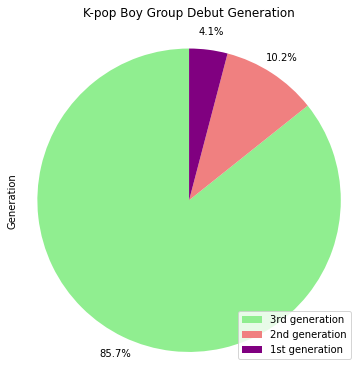

In [43]:
colors_list = ['lightgreen', 'lightcoral', 'purple']
gen_b = boys['Generation'].value_counts() # Generation column
gen_b.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, labels=None, pctdistance=1.12, 
           colors=colors_list)

plt.title('K-pop Boy Group Debut Generation\n')
plt.axis('equal')
plt.legend(labels=['3rd generation', '2nd generation', '1st generation'], loc='lower right') 
plt.show()

In [34]:
girls['Generation'] = girls.apply(lambda row: generation(row), axis=1)
girls['Generation'].value_counts()

3rd Generation    135
2nd Generation     14
1st Generation      2
Name: Generation, dtype: int64

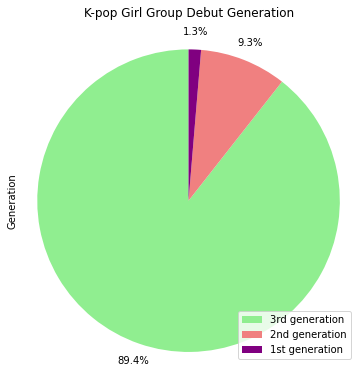

In [44]:
colors_list = ['lightgreen', 'lightcoral', 'purple']
gen_g = girls['Generation'].value_counts() # Generation column
gen_g.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, labels=None, pctdistance=1.12, 
           colors=colors_list)

plt.title('K-pop Girl Group Debut Generation\n')
plt.axis('equal')
plt.legend(labels=['3rd generation', '2nd generation', '1st generation'], loc='lower right') 
plt.show()

We can see from the both pie chart, above 80% of K-pop groups debuted in 3rd generation. Let's discuss why this can be happen :

**a) 1st Generation**

The 1st generation began with the debut of a 3-member group that is credited with inspiring K-pop as we know it today: Seo Taiji and Boys. Around this time, K-pop began to gain attention in East and Southeast Asia as a result of a growing regional interest in Korean culture called “Hallyu.” Today, Hallyu is a global phenomenon influencing food, beauty, music, technology, and fashion.

**b) 2nd Generation**

As K-pop’s popularity grew outside of South Korea, so did the size of its groups. While 1st generation group sizes typically ranged from 3-5 members, the 2nd generation debuted nine members or more so the new era is called "super-size". The famous examples: Super Junior (2005) and Girls’ Generation (2007). It is only in the past five years that super-size groups have become the new normal in K-pop.

**c) 3rd Generation**

The 3rd generation—the current generation—brought with it the largest idol groups yet, among them the 23-member NCT(2016 to 2020). K-pop is now on the cusp of its 4th generation, which is likely to bring more experimentation with size. Now that the success of larger groups has been proven, it’s possible that companies are more willing to take on the financial risk of producing a super-size group, especially considering the popularity of three trends: international casting, subunits, and idol survival shows.

From this short explanation, we could know that in 1st generation is the beginning of "Hallyu". The groups, the members, and the company is not much. Next, the 2nd generation tried to expand the business by adding the number of members. More groups debuted in this era (about 9%-10%). Then, 3rd generation tried to bring more members, and 80% of groups are born in this era. K-pop is worldwide now, bringing more international fans, the hype is everywhere. The companies always trying to use the existing opportunities.

## Conlusions

After these explorations, we can see some insight behind the K-pop groups data from 1992 to 2020 :
- The number of girl groups is greater than boy groups. There are 147 boy groups and 152 girl groups in K-pop.
- A K-pop group can be managed by one or multiple companies and a company can have one or more girl groups and boy groups.
- The number of members in the K-pop group can change for any reason, it can be addition or subtraction. The girl group has more subtraction members but also more added members.
- The boy group is more active than the girl group. Generally, inactive groups are caused by disbanding.
- The number of hiatus groups is not quite different between the boy and girl groups.
- aBOVE 80% of groups are born in the 3rd generation tried. The group has more members, being worldwide and more popular, bringing more international fans, and the hype is everywhere.

In [36]:
boys.head()

,Name,Debut,Company,Members,Orig. Memb.,Active,Memb. Status,Debut year,Generation
0,100%,2012-09-18,TOP Media,4,7,Yes,Subtracted,2012,3rd Generation
1,14U,2017-04-17,BG,14,14,Yes,Same,2017,3rd Generation
2,1the9,2019-02-09,MBK,9,9,Yes,Same,2019,3rd Generation
3,24K,2012-09-06,Choeun,8,6,Yes,Added,2012,3rd Generation
4,2AM,2008-06-21,"JYP, Big Hit",4,4,No,Same,2008,2nd Generation


In [37]:
girls.head()

,Name,Debut,Company,Members,Orig. Memb.,Active,Memb. Status,Debut year,Generation
0,(G)I-DLE,2018-05-02,Cube,6,6,Yes,Same,2018,3rd Generation
1,15&,2012-10-05,JYP,2,2,No,Same,2012,3rd Generation
2,2EYES,2013-07-20,SidusHQ,4,5,No,Subtracted,2013,3rd Generation
3,2NE1,2009-05-06,YG,4,4,No,Same,2009,2nd Generation
4,3YE,2019-05-21,GH,3,3,Yes,Same,2019,3rd Generation
